# XGBM

In [141]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score 
import statsmodels.api as sm

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve, auc, roc_auc_score


plt.rcParams.update({'font.size': 17})

df_train=pd.read_csv('Ravdess_TRAIN_transformed.csv')
df_test=pd.read_csv('Ravdess_TEST_transformed.csv')

## Data splitting

In [142]:
X, y = df_train.drop(["emotion", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "sex","mfcc_q05"], axis=1), df_train[["mfcc_q05"]].values.flatten()

In [143]:
X_train_df, y_train_df = df_train.drop(["emotion", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "sex","mfcc_q05"], axis=1), df_train[["mfcc_q05"]].values.flatten()
X_test_df, y_test_df = df_test.drop(["emotion", "vocal_channel", "emotional_intensity", "statement", "repetition", "actor", "sex","mfcc_q05"], axis=1), df_test[["mfcc_q05"]].values.flatten()

## Grid search 

In [149]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = XGBRegressor()

param_grid = {
                'max_depth' : range(3,7),
                'learning_rate' : [0.001,0.005,0.01,0.05,0.1],
                'reg_lambda' : [1,2,4,5],
                'n_estimators' : range(50,300,50)
}


grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250, 'reg_lambda': 1}
Best score:  0.9497834845595168


Best hyperparameters:  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250, 'reg_lambda': 1} 
Best score:  0.9497834845595168

## Fit best parameter and test only on TRAIN dataset

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


clf = XGBRegressor(objective='reg:squarederror', 
                    max_depth = 4,
                    learning_rate = 0.05,
                    reg_lambda = 1,
                    n_estimators = 250
                   )

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Training R2: \t%f'%clf.score(X_train,y_train))

print('R2: \t\t%f' % r2_score(y_test, y_pred))
print('MSE: \t\t%f' % mean_squared_error(y_test, y_pred))
print('MAE: \t\t%f' % mean_absolute_error(y_test, y_pred))

Training R2: 	0.994839
R2: 		0.960640
MSE: 		0.023771
MAE: 		0.097045


## Refit on all Train daatset and tested on Test dataset

In [171]:
clf.fit(X_train_df, y_train_df)

y_pred_df = clf.predict(X_test_df)

#print('Training R2: \t%f'%clf.score(X_train,y_train))

print('R2: \t\t%f' % r2_score(y_test_df, y_pred_df))
print('MSE: \t\t%f' % mean_squared_error(y_test_df, y_pred_df))
print('MAE: \t\t%f' % mean_absolute_error(y_test_df, y_pred_df))

R2: 		0.941973
MSE: 		0.034964
MAE: 		0.118467


## Plots

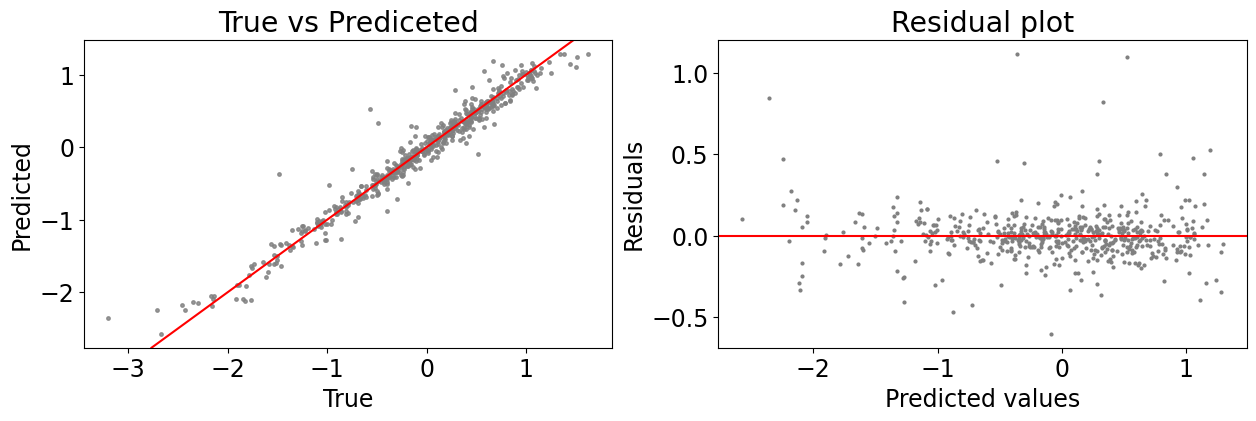

In [198]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.plot( y_test, y_pred, 'o', markersize=2.5, color="grey", alpha=0.8)
plt.axline((1, 1), slope=1,c="red")
plt.title('True vs Prediceted')
plt.xlabel("True")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
residuals = y_pred - y_test
plt.plot( y_pred, residuals, 'o', markersize=2, color="gray", alpha=1, label='Inliers')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()